In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import orjsonl
import numpy as np

In [14]:
all_values = []
datas = []
# names = ["short", "truncated long", "TIPO + short", "TIPO + truncated long"]
# model_order = [
#     "short",
#     "TIPO + short",
#     "truncated long",
#     "TIPO + truncated long",
# ]
# for name, data in zip(names, orjsonl.load("./coyo-ai-corrupt.jsonl", "rb")):
#     datas.extend((name, d) for d in data)
#     all_values.extend(data)
# for name, data in zip(names, orjsonl.load("./gbc-ai-corrupt.jsonl", "rb")):
#     datas.extend((name, d) for d in data)
#     all_values.extend(data)


# names = ["GPT4o-mini", "Original", "Promptist", "TIPO", "MagicPrompt"]
# model_order = ["Original", "GPT4o-mini", "MagicPrompt", "Promptist", "TIPO"]
# for name, data in zip(
#     names, orjsonl.load("../../../output/scenery-aicorrupt.jsonl", "rb")
# ):
#     datas.extend((name, d) for d in data)
#     all_values.extend(data)


# names = ["TIPO", "Original", "GPT4o-mini", "Promptist", "MagicPrompt"]
# model_order = ["Original", "GPT4o-mini", "MagicPrompt", "Promptist", "TIPO"]
# for name, data in zip(names, orjsonl.load(r"../../../output/sd35l-corrupt.jsonl", "rb")):
#     print(len(data))
#     datas.extend((name, d) for d in data)
#     all_values.extend(data)

names = ["Original", "TIPO", "GPT4o-mini", "Promptist", "MagicPrompt"]
model_order = [
    # "Original-short",
    # "GPT4o-mini-short",
    # "MagicPrompt-short",
    # "Promptist-short",
    # "TIPO-short",
    # "Original-tlong",
    # "GPT4o-mini-tlong",
    # "MagicPrompt-tlong",
    # "Promptist-tlong",
    # "TIPO-tlong"
]
# for name, data in zip(names, orjsonl.load("../../../output/short-tlong-aicorrupt.jsonl", "rb")):
#     datas.extend((name+"-short", d) for d in data[::2])
#     datas.extend((name+"-tlong", d) for d in data[1::2])
#     all_values.extend(data)

tipo200mdata = orjsonl.load(
    "../../../output/tipo-200m-short-tlong-aicorrupt.jsonl", "rb"
)
short = tipo200mdata[0]
tlong = tipo200mdata[1]
datas.extend(("TIPO-200M-tlong", d) for d in short)
model_order.append("TIPO-200M-tlong")

datas.extend(("TIPO-200M-short", d) for d in tlong)
model_order.append("TIPO-200M-short")

tipo500mdata = orjsonl.load(
    "../../../output/tipo-200m-short-tlong-aicorrupt.jsonl", "rb"
)[2:]
short = tipo500mdata[0]
tlong = tipo500mdata[1]
datas.extend(("TIPO-500M-tlong", d) for d in short)
model_order.append("TIPO-500M-tlong")

datas.extend(("TIPO-500M-short", d) for d in tlong)
model_order.append("TIPO-500M-short")


all_values = np.array(all_values)
df = pd.DataFrame(datas, columns=["model", "ai_corrupt"])
print(df)
print(df["ai_corrupt"].min(), df["ai_corrupt"].max())

                model  ai_corrupt
0     TIPO-200M-tlong    0.473527
1     TIPO-200M-tlong    0.977317
2     TIPO-200M-tlong    0.980865
3     TIPO-200M-tlong    0.331603
4     TIPO-200M-tlong    0.102483
...               ...         ...
7995  TIPO-500M-short    0.902820
7996  TIPO-500M-short    0.006897
7997  TIPO-500M-short    0.614301
7998  TIPO-500M-short    0.829932
7999  TIPO-500M-short    0.848464

[8000 rows x 2 columns]
0.0001322031021118164 0.9996552972006612


In [15]:
min = df["ai_corrupt"].min()
max = df["ai_corrupt"].max()
std = df["ai_corrupt"].std()
mean = df["ai_corrupt"].mean()

# df["ai_corrupt"] = (df["ai_corrupt"] - mean) / std
print(min, max, std, mean)

0.0001322031021118164 0.9996552972006612 0.4342139824671467 0.5023467311463391


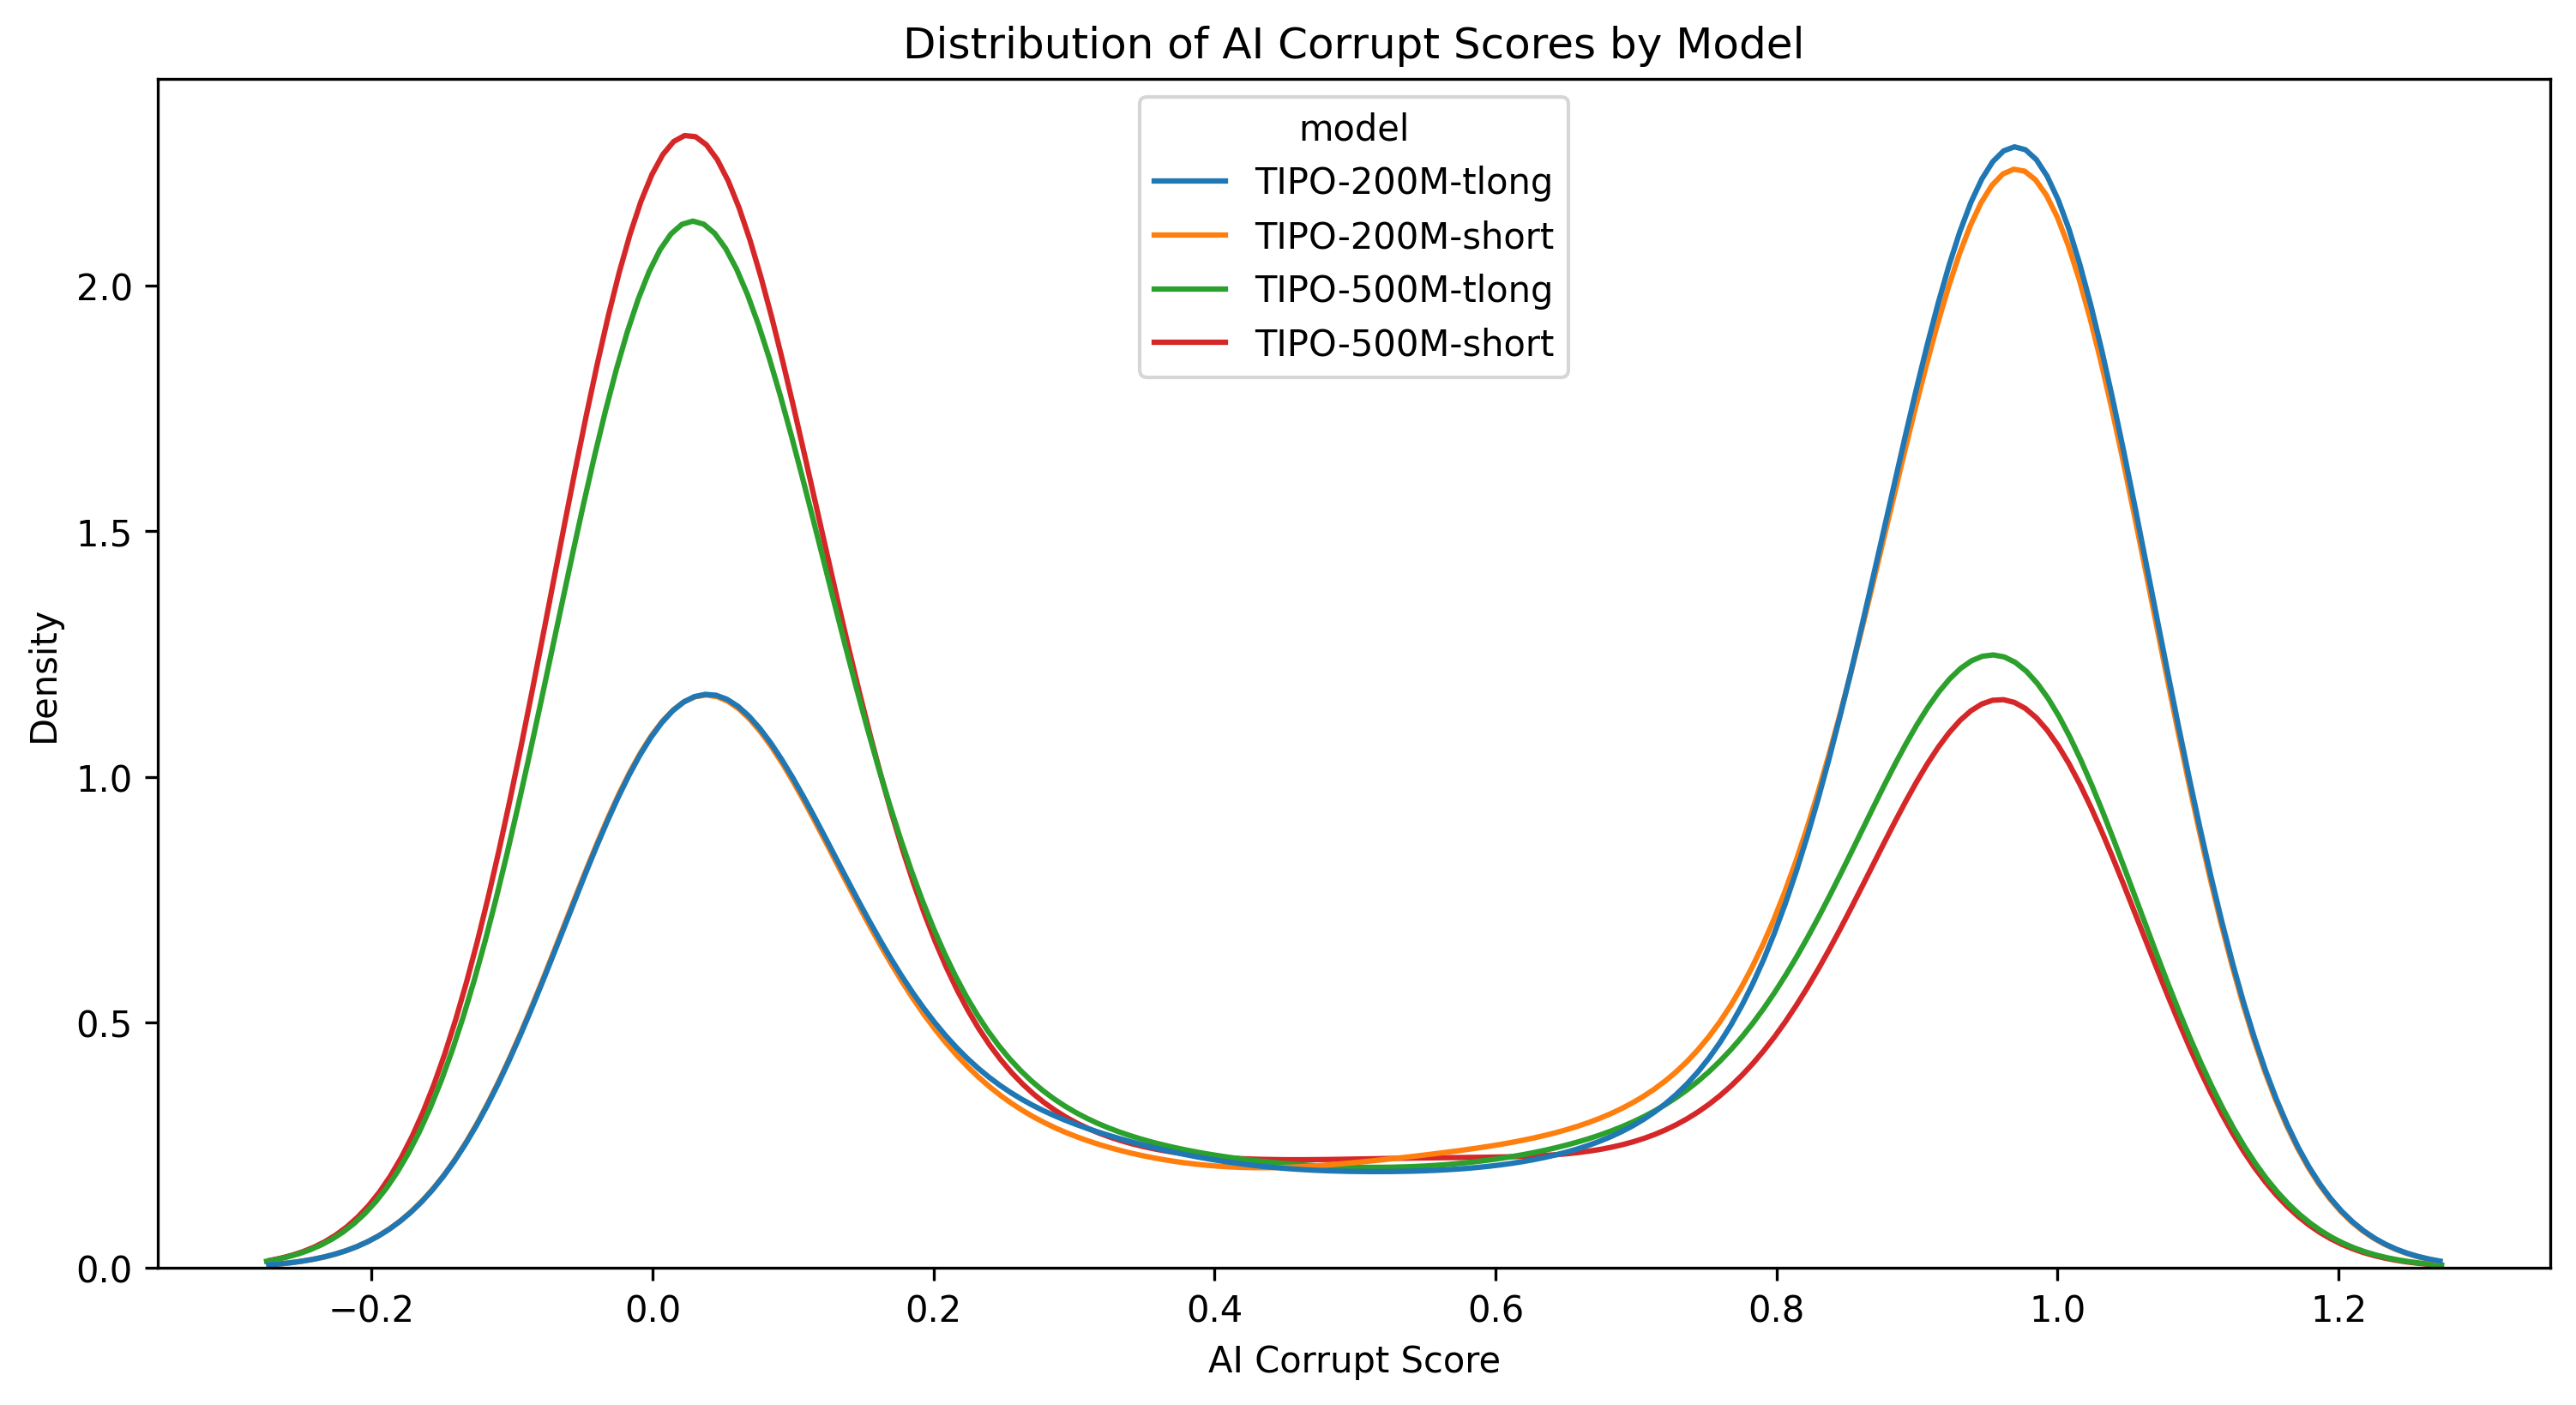

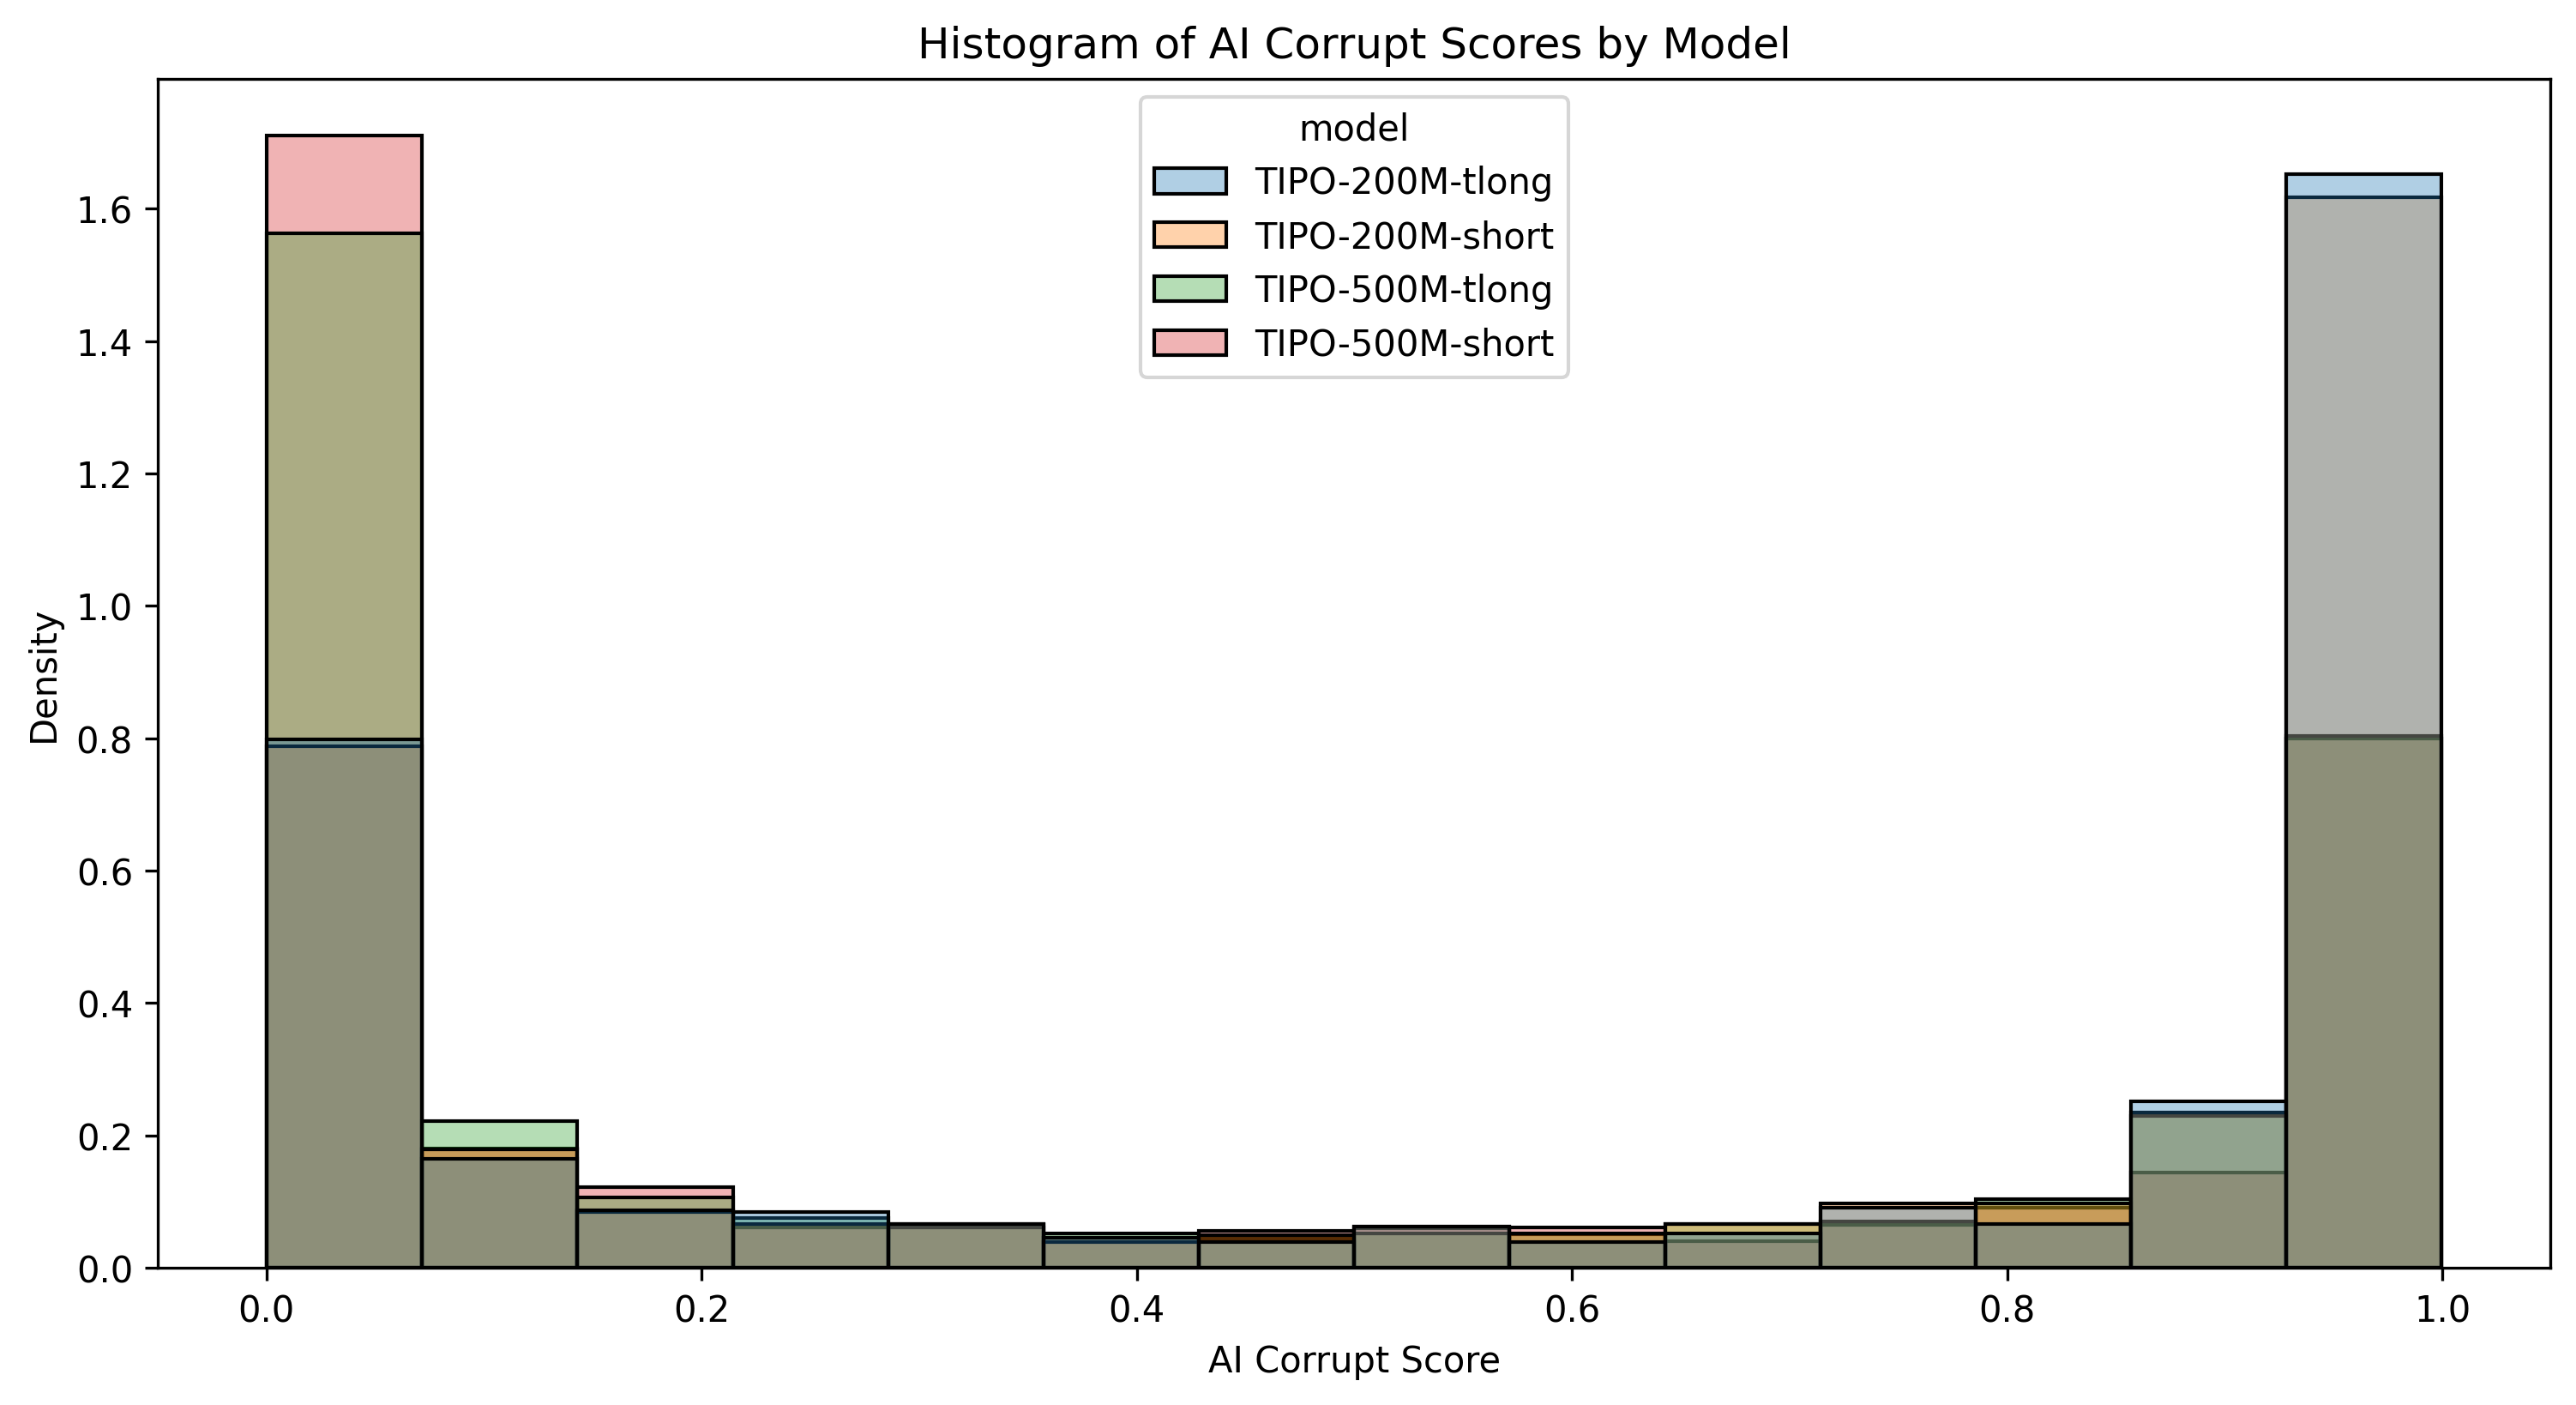

In [16]:
import seaborn as sns

# Seaborn distribution plot
plt.figure(figsize=(12, 6), dpi=300)
sns.kdeplot(data=df, x="ai_corrupt", hue="model", common_norm=False)
plt.title("Distribution of AI Corrupt Scores by Model")
plt.xlabel("AI Corrupt Score")
plt.ylabel("Density")

# Alternative: Histogram
plt.figure(figsize=(12, 6), dpi=300)
sns.histplot(data=df, x="ai_corrupt", hue="model", stat="density", alpha=0.35)
plt.title("Histogram of AI Corrupt Scores by Model")
plt.xlabel("AI Corrupt Score")
plt.ylabel("Density")

plt.show()

In [17]:
y_scale = 1.0
box_scale = 0.7

C:\Users\apoll\AppData\Local\Temp\ipykernel_837032\3663307275.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantiles = df_sorted.groupby("model")["ai_corrupt"].quantile(
C:\Users\apoll\AppData\Local\Temp\ipykernel_837032\3663307275.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df_sorted.groupby("model")["ai_corrupt"].mean()
C:\Users\apoll\AppData\Local\Temp\ipykernel_837032\3663307275.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

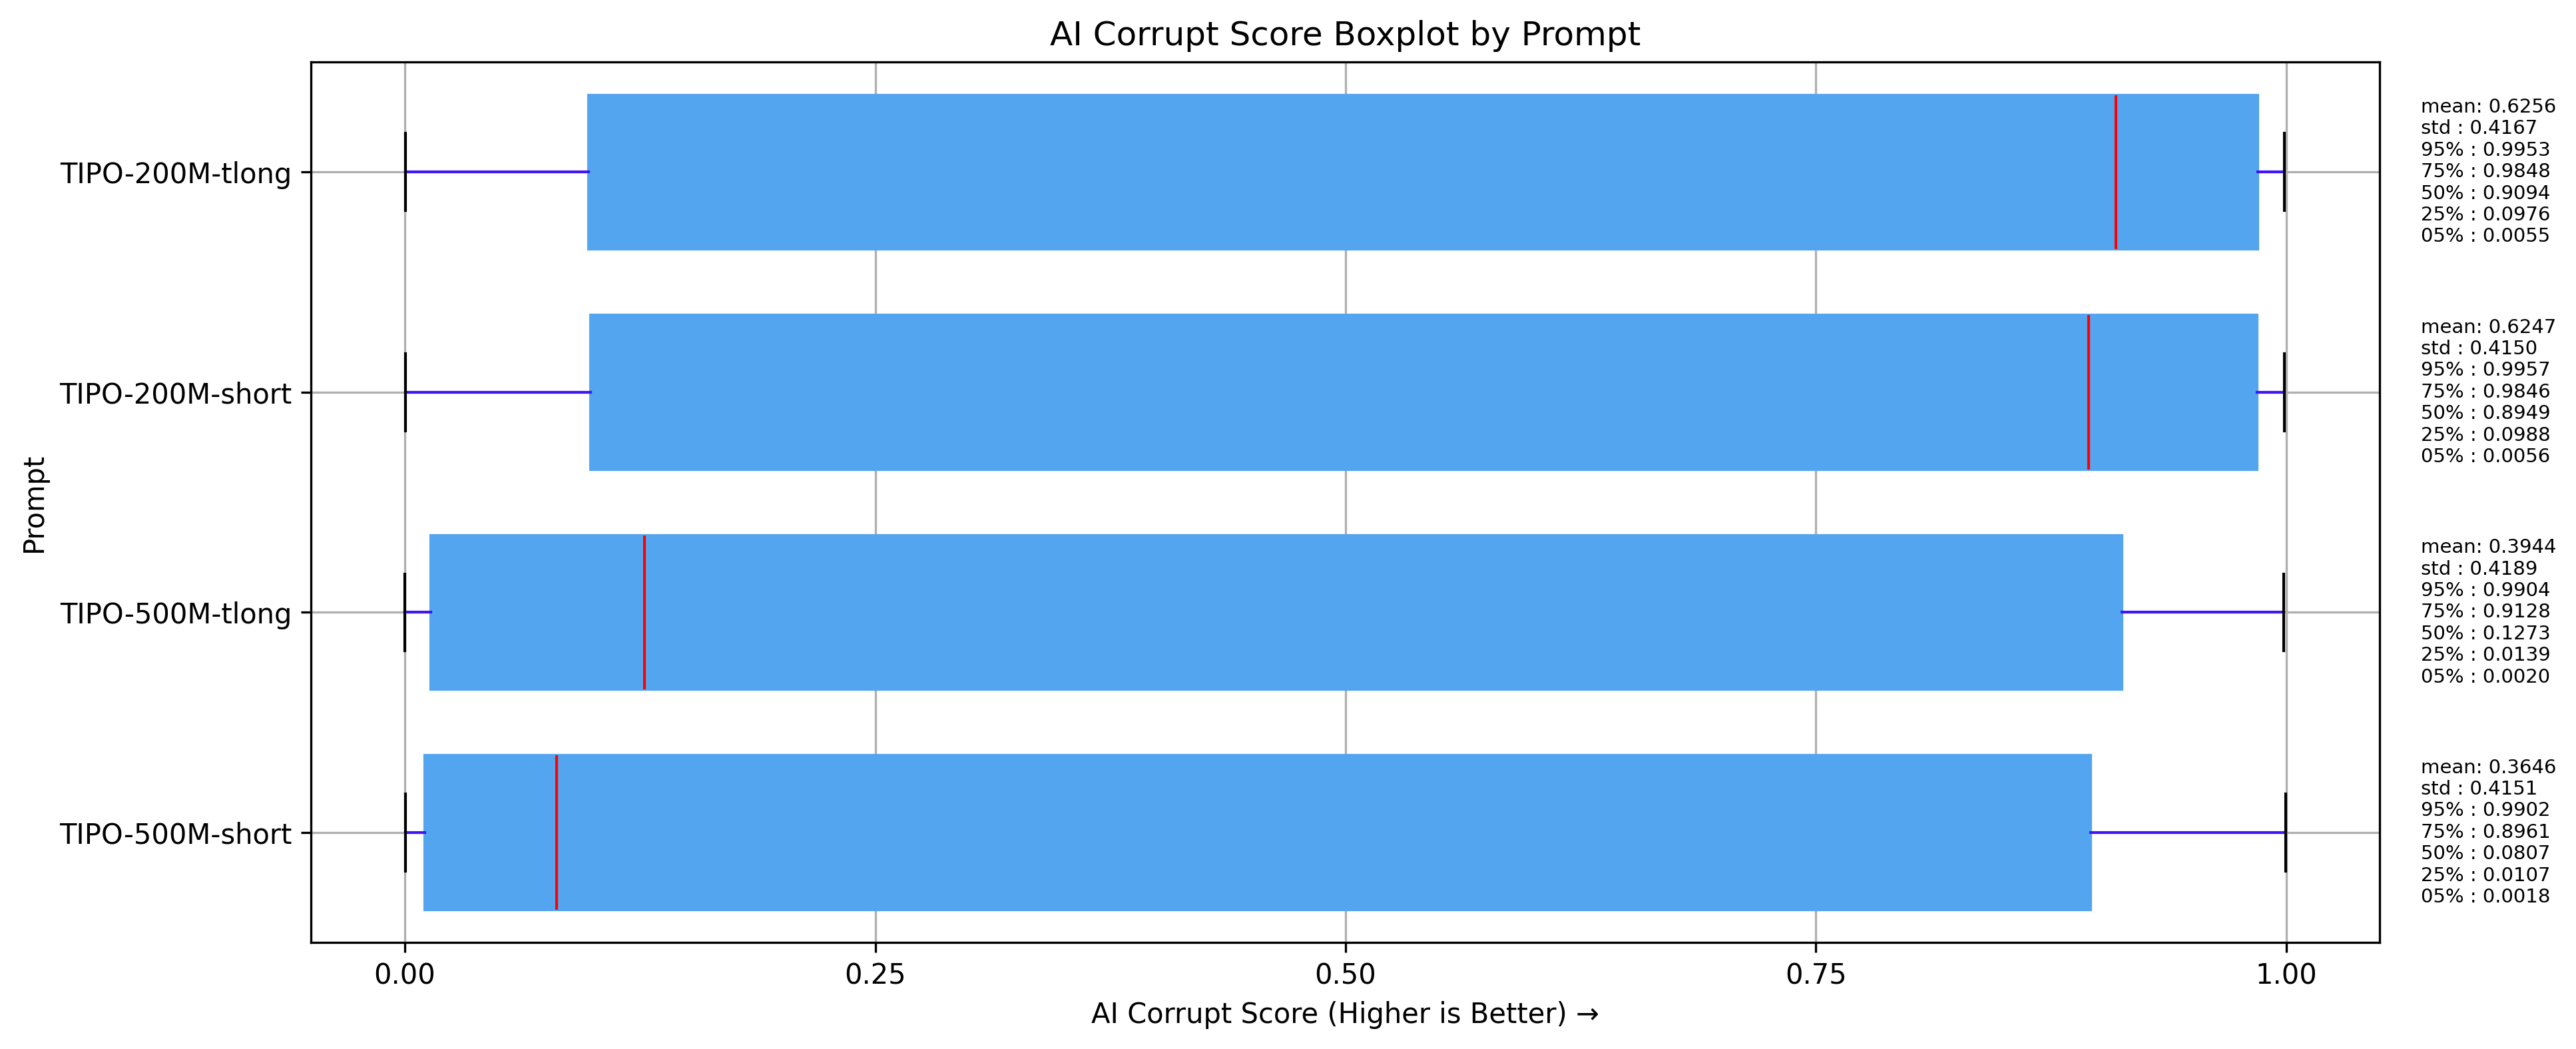


Quantiles for each model:
model                
TIPO-500M-short  0.05    0.001765
                 0.25    0.010696
                 0.50    0.080708
                 0.75    0.896053
                 0.95    0.990196
TIPO-500M-tlong  0.05    0.002046
                 0.25    0.013924
                 0.50    0.127278
                 0.75    0.912763
                 0.95    0.990354
TIPO-200M-short  0.05    0.005552
                 0.25    0.098812
                 0.50    0.894876
                 0.75    0.984562
                 0.95    0.995662
TIPO-200M-tlong  0.05    0.005500
                 0.25    0.097617
                 0.50    0.909358
                 0.75    0.984818
                 0.95    0.995275
Name: ai_corrupt, dtype: float64


In [18]:
# Calculate statistics for sorting
df_stats = (
    df.groupby("model").agg({"ai_corrupt": ["mean", lambda x: x.mean()]}).reset_index()
)
df_stats.columns = ["model", "mean", "ai_corrupt"]

# Choose sorting method (uncomment the desired method)
# df_stats_sorted = df_stats.sort_values('median', ascending=False)
df_stats_sorted = df_stats.sort_values("mean", ascending=False)

# Sort the original dataframe based on the stats
df_sorted = df.set_index("model").loc[model_order].reset_index()
# print(df_stats)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(13, 5.5), dpi=300)

df_sorted["model"] = pd.Categorical(
    df_sorted["model"],
    categories=reversed(list(df_sorted["model"].unique())),
    ordered=True,
)
positions = [i * y_scale for i in range(len(model_order))]
# Create the horizontal boxplot using the sorted data
boxplot = df_sorted.boxplot(
    column="ai_corrupt",
    by="model",
    vert=False,
    ax=ax,
    patch_artist=True,
    medianprops={"color": "red"},
    showfliers=False,
    color={
        "boxes": "#54A5F0",
        "whiskers": "#4016F5",
        "medians": "red",
        "caps": "black",
    },
    positions=positions,
    widths=[box_scale] * len(model_order),
)

# Customize the plot
ax.set_title("AI Corrupt Score Boxplot by Prompt")
ax.set_ylabel("Prompt")
ax.set_xlabel("AI Corrupt Score (Higher is Better) →")

# Remove the automatically generated suptitle
plt.suptitle("")

# Adjust the y-axis tick labels
plt.yticks(rotation=0)

# Adjust the data range and tick marks
min_score = df["ai_corrupt"].min()
max_score = df["ai_corrupt"].max()
range_margin = (max_score - min_score) * 0.05
# ax.set_xlim(-1.5, 1.5)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))

# Calculate and add quantile information
quantiles = df_sorted.groupby("model")["ai_corrupt"].quantile(
    [0.05, 0.25, 0.5, 0.75, 0.95]
)
reverse_map = {
    v1: v2
    for v1, v2 in zip(
        df_sorted["model"].unique(), reversed(df_sorted["model"].unique())
    )
}

means = df_sorted.groupby("model")["ai_corrupt"].mean()
std = df_sorted.groupby("model")["ai_corrupt"].std()

# print(quantiles)
for i, model in enumerate(df_sorted["model"].unique()):
    model = reverse_map[model]
    quantile_text = (
        f"mean: {means.loc[model]:.4f}\n"
        f"std : {std.loc[model]:.4f}\n"
        f"95% : {quantiles.loc[model, 0.95]:.4f}\n"
        f"75% : {quantiles.loc[model, 0.75]:.4f}\n"
        f"50% : {quantiles.loc[model, 0.50]:.4f}\n"
        f"25% : {quantiles.loc[model, 0.25]:.4f}\n"
        f"05% : {quantiles.loc[model, 0.05]:.4f}"
    )
    ax.annotate(
        quantile_text,
        xy=(1.02, i * y_scale),
        xycoords=("axes fraction", "data"),
        va="center",
        ha="left",
        fontsize=7,
    )

# Display the plot
plt.tight_layout()
plt.show()

# Log quantile information
print("\nQuantiles for each model:")
print(quantiles)